In [1]:
import numpy as np 
import pandas as pd 
import pymc3 as pm
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from theano import tensor as t
import arviz as az

In [2]:
## test model
i = np.array([[1, 1, 1], [1, 1, 1]])
a = np.array([[1, 1, 1]]).T * 0
b = np.diag([1, 0.5, 0.75]) * 10
ci = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) / 100
c = - ci.dot(ci.T)


x = np.random.random([3, 1000]) * 100
y = i.dot(a + b.dot(x) + (c.dot(x)) * x)


<AxesSubplot:>

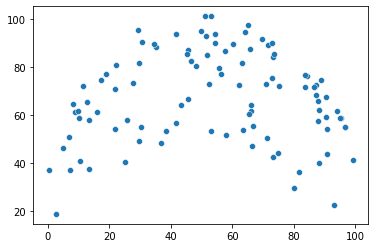

In [3]:
## artificial data
x = np.random.random([2, 100]) * 100
noise = np.random.randn(2,100) * 3

y0 = (100 * x[0]  - x[0] ** 2) / 25
y1 = (100 * x[1]  - x[1] ** 2) / 25

y = np.array([0.5 * ( 0.3 * y0 + 0.7 * y1), 0.5 * (y0 + y1)]) + noise

sns.scatterplot(x=x[0], y=y[1])

In [4]:
pm.Wishart.dist(nu=2, V=np.diag([2, 2]), shape=[2,2]).random()

array([[ 0.93812404,  1.45763591],
       [ 1.45763591, 10.06719384]])

In [5]:
np.ones([2,2])

array([[1., 1.],
       [1., 1.]])

In [15]:
with pm.Model() as model:
    # define rvs
    b = pm.Uniform('b', -100, 100, shape=[2,2])
    c = pm.Uniform('c', -100, 100, shape=[2,2])
    sig = pm.HalfCauchy('sig', beta=1)
    # compute quality : a + b.dot(x) + (c.dot(x)) * x
    ym = t.dot(b, x) + t.dot(c, x) * x
    # compute likelihood
    lkh = pm.Normal('lkh', mu=ym, sigma=sig, observed=y)
    start = pm.find_MAP()
    idata = pm.sample(return_inferencedata=True, start=start)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, c, b]


array([[<AxesSubplot:title={'center':'b\n0, 0'}>,
        <AxesSubplot:title={'center':'b\n0, 0'}>],
       [<AxesSubplot:title={'center':'b\n0, 1'}>,
        <AxesSubplot:title={'center':'b\n0, 1'}>],
       [<AxesSubplot:title={'center':'b\n1, 0'}>,
        <AxesSubplot:title={'center':'b\n1, 0'}>],
       [<AxesSubplot:title={'center':'b\n1, 1'}>,
        <AxesSubplot:title={'center':'b\n1, 1'}>],
       [<AxesSubplot:title={'center':'c\n0, 0'}>,
        <AxesSubplot:title={'center':'c\n0, 0'}>],
       [<AxesSubplot:title={'center':'c\n0, 1'}>,
        <AxesSubplot:title={'center':'c\n0, 1'}>],
       [<AxesSubplot:title={'center':'c\n1, 0'}>,
        <AxesSubplot:title={'center':'c\n1, 0'}>],
       [<AxesSubplot:title={'center':'c\n1, 1'}>,
        <AxesSubplot:title={'center':'c\n1, 1'}>],
       [<AxesSubplot:title={'center':'sig'}>,
        <AxesSubplot:title={'center':'sig'}>]], dtype=object)

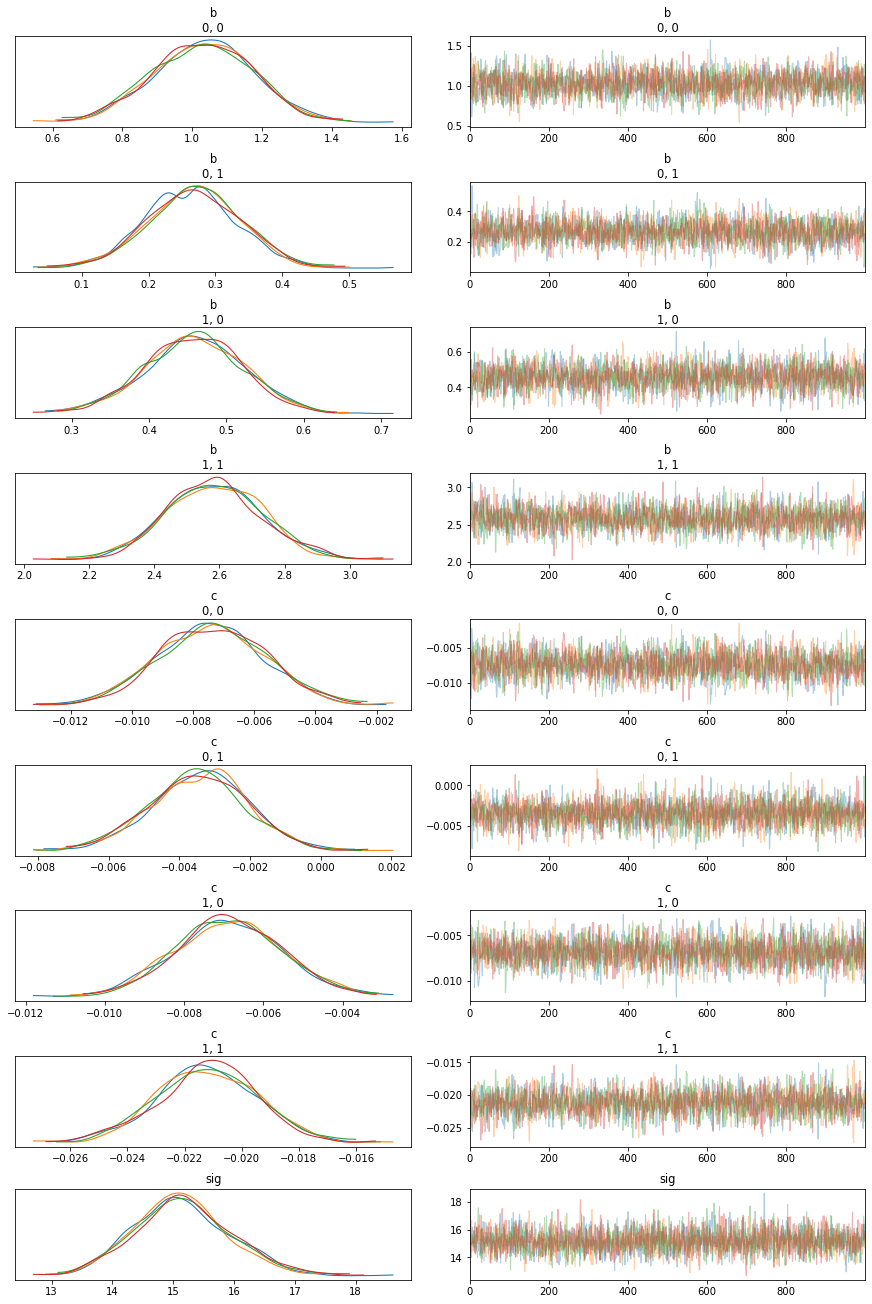

In [16]:
az.plot_trace(idata)

In [18]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data